In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import pickle
import numpy as np

Using TensorFlow backend.


In [2]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [3]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [4]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [5]:
from keras.optimizers import Adam
learning_rate = 0.00146
adam = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

# from keras.optimizers import SGD
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [6]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'img_data/training_data',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

testing_set = test_datagen.flow_from_directory(
        'img_data/testing_data',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 900 images belonging to 10 classes.
Found 100 images belonging to 10 classes.


In [7]:
history = model.fit_generator(
                    training_set,
                    steps_per_epoch=900,
                    epochs=3,
                    validation_data=testing_set,
                    validation_steps=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/3
900/900 [==============================] - 1276s 1s/step - loss: 0.4302 - acc: 0.8552 - val_loss: 0.0729 - val_acc: 0.9700
Epoch 2/3
900/900 [==============================] - 1269s 1s/step - loss: 0.0060 - acc: 0.9987 - val_loss: 0.0087 - val_acc: 1.0000
Epoch 3/3
900/900 [==============================] - 1271s 1s/step - loss: 1.3001e-04 - acc: 1.0000 - val_loss: 0.0067 - val_acc: 1.0000


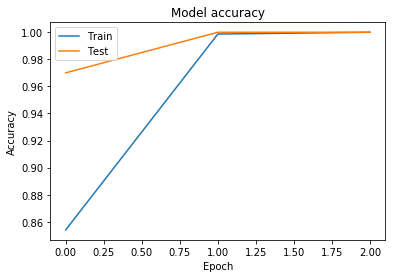

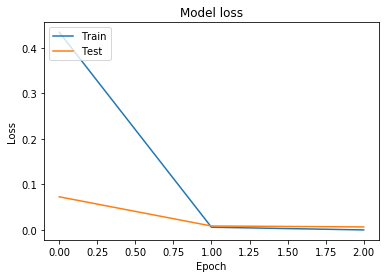

In [9]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [10]:
from keras.models import load_model

model.save('my_model.h5')
del model  # deletes the existing model

#How to load your model
#model = load_model('my_model.h5')


In [ ]:
from keras.utils import plot_model
#How to save the model's architecture as png file
plot_model(model, to_file='model.png')